In [34]:
import pandas as pd
import dateparser
import datetime as datetime
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from textblob import TextBlob

In [35]:
df_linkedin1 = pd.read_csv('df_linkedin.csv')
df_linkedin2 = pd.read_csv('df_linkedin2.csv')
df_linkedin3 = pd.read_csv('df_linkedin3.csv')
df_linkedin4 = pd.read_csv('df_linkedin4.csv')
df_linkedin5 = pd.read_csv('df_linkedin5.csv')
df_linkedin6 = pd.read_csv('df_linkedin6.csv')
df_linkedin7 = pd.read_csv('df_linkedin7.csv')
df_linkedin8 = pd.read_csv('df_linkedin8.csv')
df_linkedin9 = pd.read_csv('df_linkedin9.csv')
df_linkedin10 = pd.read_csv('df_linkedin10.csv')
df_linkedin11 = pd.read_csv('df_linkedin11.csv')
df_linkedin12 = pd.read_csv('df_linkedin12.csv')
df_linkedin13 = pd.read_csv('df_linkedin13.csv')


In [36]:
df_linkedin = pd.concat([df_linkedin1, df_linkedin2, df_linkedin3, df_linkedin4, df_linkedin5, df_linkedin6, df_linkedin7, df_linkedin8, df_linkedin9, df_linkedin10, df_linkedin11, df_linkedin12, df_linkedin13], ignore_index=True)

In [41]:
def clean_linkedin(df):
    sia = SentimentIntensityAnalyzer()
    df = df[df['Date'] != 'NaN']
    df['Date'] = df['Date'].astype(str)
    df['Date'] = df['Date'].apply(lambda x: dateparser.parse(x).strftime('%d-%m-%Y'))
    df['Content'] = df['Content'].astype(str)
    df['Post sentiment'] = df['Content'].apply(lambda x: sia.polarity_scores(x)['compound'])
    df['Post subjectivity'] = df['Content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    df['Comments'] = df['Comments'].str.replace(r'\bcomment[s]?\b', '', case=False)
    df['Reposts'] = df['Reposts'].str.replace(r'\brepost[s]?\b', '', case=False)
    df['Reactions'] = df['Reactions'].fillna(0)
    df['Reposts'] = df['Reposts'].fillna(0)
    df['Comments'] = df['Comments'].fillna(0)
    df = df.rename(columns={'Content': 'Post',
                            'Name': 'Username'})

    # Reorder columns
    df = df.reindex(columns=['Username','Date','Post','Post sentiment','Post subjectivity','Comments','Reactions','Reposts'])
    return df

In [42]:
df_linkedin = df_linkedin.drop_duplicates().reset_index()
df_linkedin

,level_0,index,Name,Reactions,Comments,Reposts,Content,Date
0,0,0,LinkedIn News Europe,399,27 comments,12 reposts,Welcome to the Wrap-Up – your summary of the d...,6 days ago
1,1,1,Javier M Floren,70,5 comments,5 reposts,AI is not knly for images and marketing copies...,18 hours ago
2,2,2,José Parra (Chema Parsanz),66,6 comments,NaN,"In November of last year, I barely had 1000 co...",22 hours ago
3,3,3,Juan Luis Cano Rodríguez,30,4 comments,NaN,"""Microsoft laid off its entire ethics and soci...",1 day ago
4,4,4,Allie K. Miller,884,59 comments,117 reposts,Here’s a helpful hack to multiply your insight...,16 hours ago
...,...,...,...,...,...,...,...,...
3947,3947,4744,Luvvie Ajayi Jones,"1,966",39 comments,61 reposts,Angela Evelyn of House Bassett.First of her na...,NaN
3948,3948,4745,Rick Watson,71,49 comments,3 reposts,5 Scary Things I Learned While Shopping Amazon...,2 hours ago
3949,3949,4746,BrandSpark® Most Trusted Awards,22,NaN,2 reposts,"""Trust and reliability are central to what we ...",NaN
3950,3950,4747,Artemis Support,6,NaN,1 repost,Last week our wonderful management team took p...,NaN


In [43]:
df_linkedin = clean_linkedin(df_linkedin)

C:\Users\Tim_K\AppData\Local\Temp\ipykernel_20596\4219665793.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Comments'] = df['Comments'].str.replace(r'\bcomment[s]?\b', '', case=False)
C:\Users\Tim_K\AppData\Local\Temp\ipykernel_20596\4219665793.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reposts'] = df['Reposts'].str.replace(r'\brepost[s]?\b', '', case=False)


In [44]:
df_linkedin.loc[df_linkedin['Date'] == '15-08-2023', 'Date'] = '15-03-2023'

In [45]:
df_linkedin

,Username,Date,Post,Post sentiment,Post subjectivity,Comments,Reactions,Reposts
0,LinkedIn News Europe,09-03-2023,Welcome to the Wrap-Up – your summary of the d...,0.9679,0.570000,27,399,12
1,Javier M Floren,15-03-2023,AI is not knly for images and marketing copies...,-0.6486,0.300000,5,70,5
2,José Parra (Chema Parsanz),14-03-2023,"In November of last year, I barely had 1000 co...",0.9726,0.554167,6,66,0
3,Juan Luis Cano Rodríguez,14-03-2023,"""Microsoft laid off its entire ethics and soci...",0.0516,0.668750,4,30,0
4,Allie K. Miller,15-03-2023,Here’s a helpful hack to multiply your insight...,0.7096,0.363258,59,884,117
...,...,...,...,...,...,...,...,...
3947,Luvvie Ajayi Jones,15-03-2023,Angela Evelyn of House Bassett.First of her na...,0.0000,0.475000,39,"1,966",61
3948,Rick Watson,15-03-2023,5 Scary Things I Learned While Shopping Amazon...,0.9853,0.510381,49,71,3
3949,BrandSpark® Most Trusted Awards,15-03-2023,"""Trust and reliability are central to what we ...",0.9020,0.350000,0,22,2
3950,Artemis Support,15-03-2023,Last week our wonderful management team took p...,0.9898,0.550694,0,6,1


In [33]:
df_linkedin.to_csv('./cleaned/clean_df_linkedin', index=False)

In [1]:
import stylecloud
from IPython.display import Image
import pandas as pd

df_linkedin = pd.read_csv("./cleaned/clean_df_linkedin.csv")

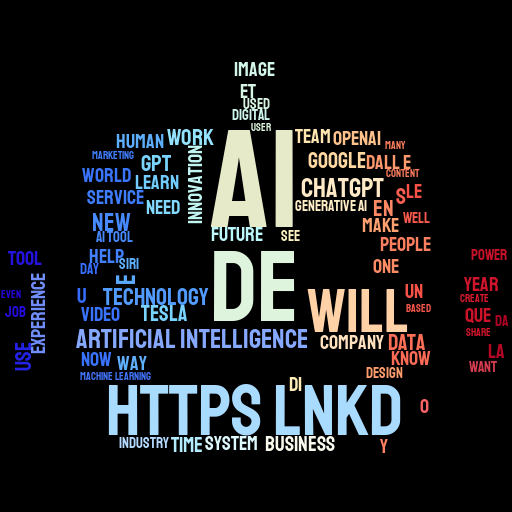

In [2]:

stopwords = ['AI', 'artificial intelligence', 'machine learning', 'data science', 'HTTPS', 'lnkdn']

stylecloud.gen_stylecloud(text=df_linkedin["Post"].str.cat(sep=' '),
                          icon_name='fas fa-robot',
                          max_words=75,
                          palette='lightbartlein.diverging.BlueDarkRed18_8',
                          background_color='black',
                          gradient='horizontal',
                          stopwords=stopwords)

Image(filename='stylecloud.png')

In [3]:
df_linkedin

,Username,Date,Post,Post sentiment,Post subjectivity,Comments,Reactions,Reposts
0,LinkedIn News Europe,09-03-2023,Welcome to the Wrap-Up – your summary of the d...,0.9679,0.570000,27,399,12
1,Javier M Floren,15-03-2023,AI is not knly for images and marketing copies...,-0.6486,0.300000,5,70,5
2,José Parra (Chema Parsanz),14-03-2023,"In November of last year, I barely had 1000 co...",0.9726,0.554167,6,66,0
3,Juan Luis Cano Rodríguez,14-03-2023,"""Microsoft laid off its entire ethics and soci...",0.0516,0.668750,4,30,0
4,Allie K. Miller,15-03-2023,Here’s a helpful hack to multiply your insight...,0.7096,0.363258,59,884,117
...,...,...,...,...,...,...,...,...
3947,Luvvie Ajayi Jones,15-03-2023,Angela Evelyn of House Bassett.First of her na...,0.0000,0.475000,39,"1,966",61
3948,Rick Watson,15-03-2023,5 Scary Things I Learned While Shopping Amazon...,0.9853,0.510381,49,71,3
3949,BrandSpark® Most Trusted Awards,15-03-2023,"""Trust and reliability are central to what we ...",0.9020,0.350000,0,22,2
3950,Artemis Support,15-03-2023,Last week our wonderful management team took p...,0.9898,0.550694,0,6,1
